### Homework 7. Интерпретация прогнозов модели (SHAP) - объясняем поведение модели на отдельных наблюдениях

#### - взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)
#### - сделать обзорный анализ выбранного датасета
#### - сделать feature engineering

Описание данных - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#
* LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
* SEX: Gender (1 = male; 2 = female). 
* EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* MARRIAGE: Marital status (1 = married; 2 = single; 3 = others). 
* AGE: Age (year). 
* PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: PAY_0 = the repayment status in September, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005. 
* PAY_AMT1-PAY_AMT6: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; . . .;PAY_AMT6 = amount paid in April, 2005. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel("default of credit card clients.xls", header=1, index_col='ID')
data.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

Пропусков нет. Типы данных корректны.


У нас есть 22 признака и 1 целевая переменная (бинарная) - нужно определить заплатит ли клиент по кредиту в следующем месяце.

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


Вероятно есть некоторые выбросы на правых границах интервалов для признаков BILL_AMT и PAY_AMT. В остальном явной неточности в данных не заметно.

Быстро посмотрим на распределение.

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'EDUCATION'}>,
        <AxesSubplot:title={'center':'MARRIAGE'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'PAY_0'}>,
        <AxesSubplot:title={'center':'PAY_2'}>,
        <AxesSubplot:title={'center':'PAY_3'}>,
        <AxesSubplot:title={'center':'PAY_4'}>,
        <AxesSubplot:title={'center':'PAY_5'}>],
       [<AxesSubplot:title={'center':'PAY_6'}>,
        <AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>,
        <AxesSubplot:title={'center':'BILL_AMT4'}>],
       [<AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>,
        <AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}

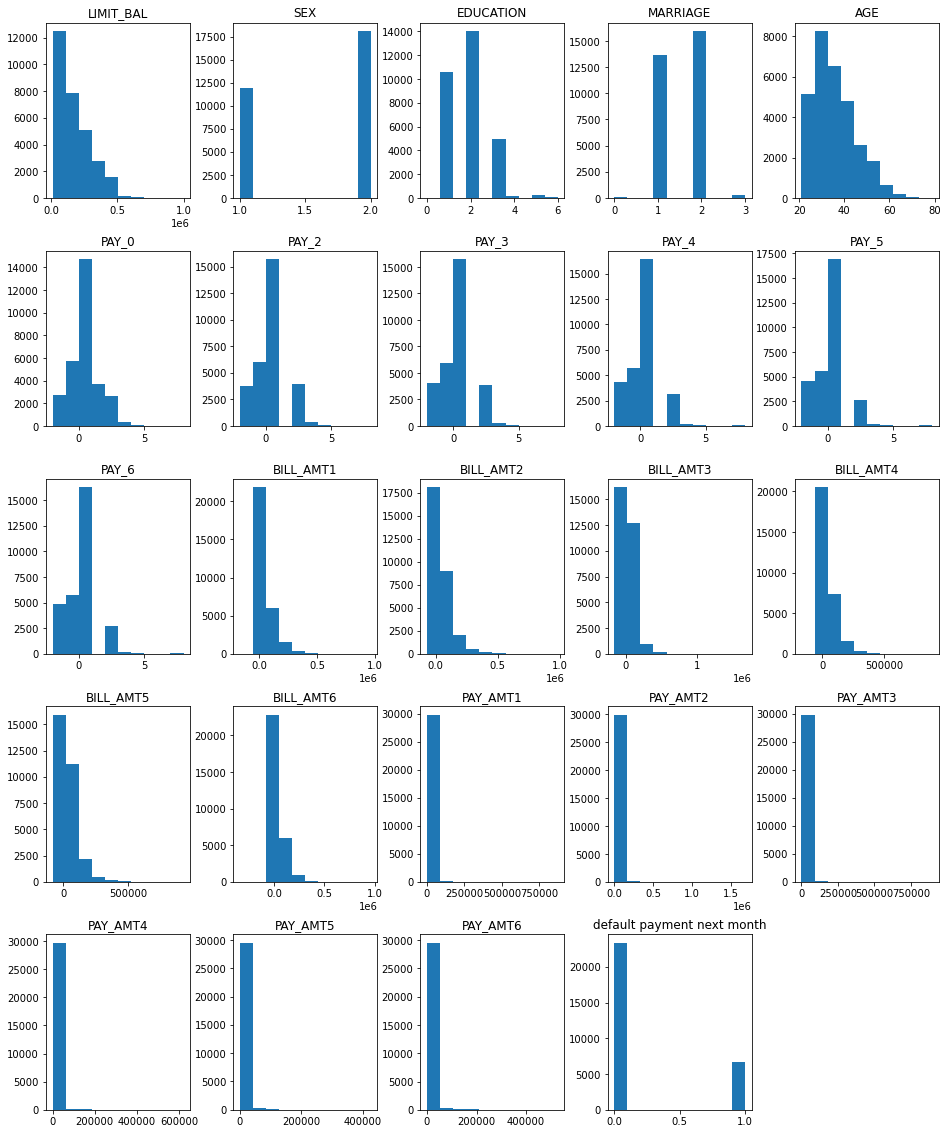

In [7]:
df_num_features = data.select_dtypes(include='int64')
df_num_features.hist(figsize=(16,20), bins=10, grid=False)

Предположение о выбросах в правой части интервалов подтверждается.

Feature Engineering не требуется, т.к. мы будем использовать CatBoostClassifief, выделим только категориальные признаки.

**обучить любой классификатор (какой вам нравится)**

In [8]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [9]:
from sklearn.model_selection import train_test_split

x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [10]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state=42, cat_features=cat_cols, silent=True)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [11]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict, save=False):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0))
    if save:
        return {'f1': f1, 'roc': roc, 'rec': rec, 'prc': prc}
    else:
        return None

    
res_1 = evaluate_results(y_test, y_predict, True)

Classification results:
f1: 46.87%
roc: 65.53%
recall: 35.95%
precision: 67.33%


**Посмотрим на feature importances**

In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

/Users/nikolayzhukov/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


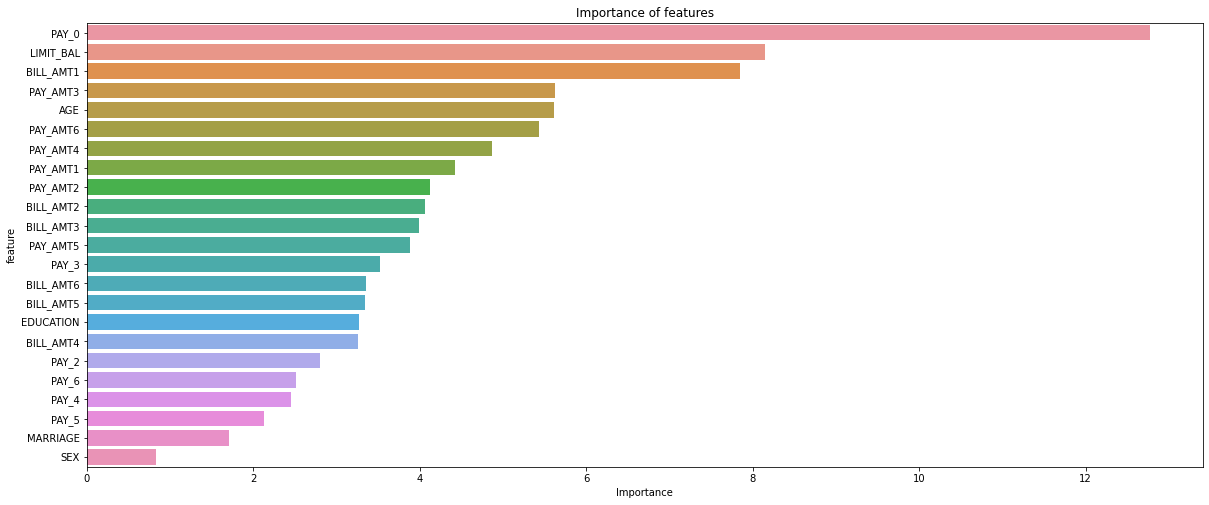

In [16]:
important_features_top = show_feature_importances(x_train.columns, model.feature_importances_)

Наиболее важными признаками являются PAY_0, LIMIT_BAL, BILL_AMT1

**посмотрим на permutation importance**

In [19]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, x_test, y_test,
                            n_repeats=30,
                            random_state=0)

/Users/nikolayzhukov/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


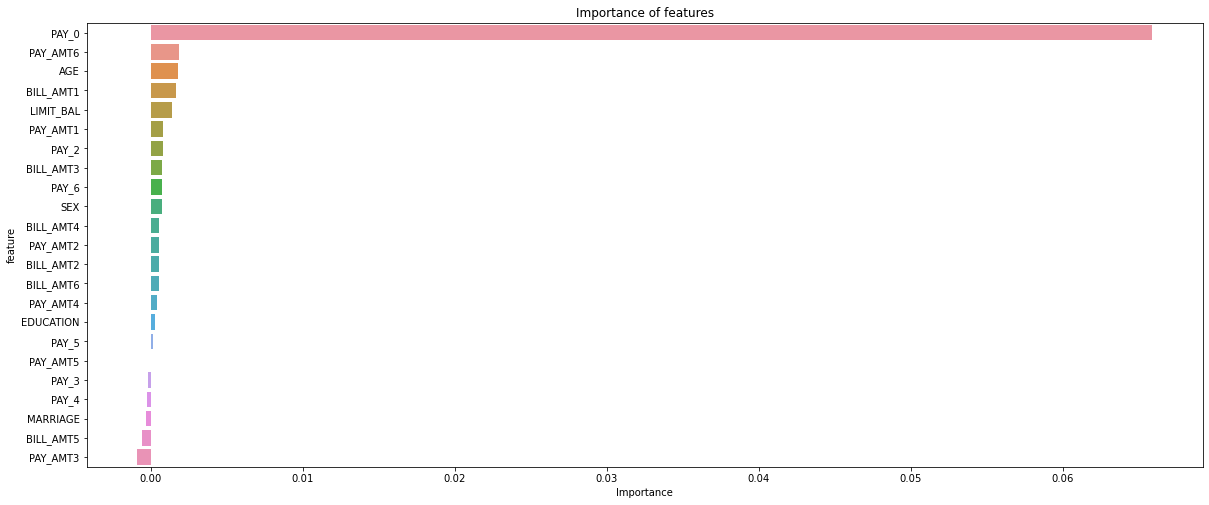

In [21]:
important_permutation_features_top = show_feature_importances(x_train.columns, r.importances_mean)

Наиболее важным признаком также является PAY_0

####   Разобраться с SHAP и построить важности признаков для: 
* всего тестового набора данных (summary_plot - дать интерпретацию)
* для топ 10%

In [25]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [67]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

C extension was not built during install!


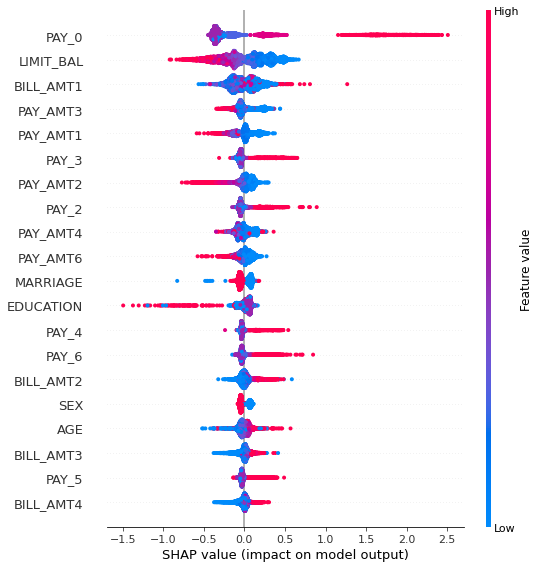

In [43]:
# summarize the effects of all the features
shap.summary_plot(shap_values, x_test)

Высокие значения признаков PAY_0-PAY_6, AGE, а также части BILL_AMT приводят к отнесению объектов к первому классу.
Высокие значения признаков PAY_AMT, SEX и EDUCATION приводят к отнесению объектов к нулевому классу. Интерпретация признаков EDUCATION и MARRIAGE корректно невозможна, т.к. их значения не поддаются прямому сравнению Education (1 = graduate school; 2 = university; 3 = high school; 4 = others), MARRIAGE (1 = married; 2 = single; 3 = others). Выход - OHE-кодирование.
______
Можно сделать вывод, что более возрастные заемщики-мужчины с просроченными ранее платежами по кредиту c меньшей вероятностью начнут платить в следующем месяце.

Наиболее перспектиные заемщики: молодые женщины, не допускающие просрочек по кредитам.

In [69]:
x_test.columns[np.argsort(np.abs(shap_values).mean(0))]

Index(['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'BILL_AMT4', 'PAY_5', 'BILL_AMT3',
       'AGE', 'SEX', 'BILL_AMT2', 'PAY_6', 'PAY_4', 'EDUCATION', 'MARRIAGE',
       'PAY_AMT6', 'PAY_AMT4', 'PAY_2', 'PAY_AMT2', 'PAY_3', 'PAY_AMT1',
       'PAY_AMT3', 'BILL_AMT1', 'LIMIT_BAL', 'PAY_0'],
      dtype='object')

**TOP-10 признаков**

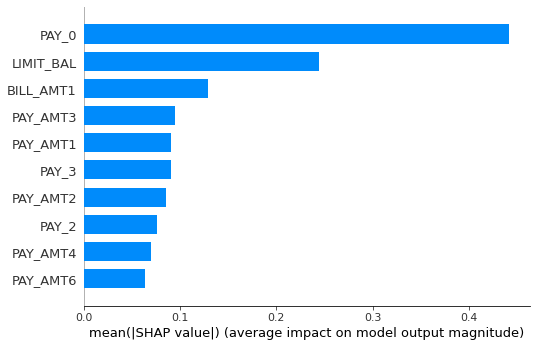

In [76]:
shap.summary_plot(shap_values, x_test, plot_type="bar", max_display=10)

Как и в предыдущих подходах, признак PAY_0, а также LIMIT_BAL и BILL_AMT1 наиболее важны.

#### для отдельных наблюдений вывести force_plot и попытаться проинтерпретировать результат

In [53]:
shap.force_plot(explainer.expected_value, shap_values[27,:], x_test.iloc[27,:])

Объект, отнесенный к первому классу за счет практически всех наиболее значимых признаков (PAY_0, LIMIT_BAL и т.д.).

In [56]:
shap.force_plot(explainer.expected_value, shap_values[348,:], x_test.iloc[348,:])

Объект, отнесенный к нулевому классу. Наиболее значимые положительные признаки PAY_0, PAY_AMT1, BILL_AMT1, отрицательные: LIMIT_BAL, EDUCATION.